#### 1. Import required libraries


In [1008]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [1009]:
df=pd.read_csv("marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [1010]:
#shape of the dataset
df.shape

(2240, 27)

In [1011]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [1012]:
#percentage of missing values
df.isna().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [1013]:
# displaying the missing value rows
df[df["Income"].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,5/11/2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,1/1/2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,1,7,6,0,0,0,0,0,0,0


In [1014]:
# replacing the missing values with mean values
df["Income"]=df["Income"].fillna(df["Income"].mean())

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [1015]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


no duplicates in the data

### 5. Drop the columns which you think redundant for the analysis 

In [1016]:
df.drop(["ID","Dt_Customer"],axis=1,inplace=True)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [1017]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1018]:
# 1)
df["Marital_Status"]=df["Marital_Status"].str.replace("Together","relationship")
df["Marital_Status"]=df["Marital_Status"].str.replace("Married","relationship")


In [1019]:
#2)
df["Marital_Status"]=df["Marital_Status"].str.replace("Divorced","Single")
df["Marital_Status"]=df["Marital_Status"].str.replace("Widow","Single")
df["Marital_Status"]=df["Marital_Status"].str.replace("Alone","Single")
df["Marital_Status"]=df["Marital_Status"].str.replace("YOLO","Single")
df["Marital_Status"]=df["Marital_Status"].str.replace("Absurd","Single")


In [1020]:
df["Marital_Status"].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [1021]:
df["Total_Expenses"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [1022]:
df["Total_Expenses"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [1023]:
df["Num_Total_Purchases"]=df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]+df["NumDealsPurchases"]

In [1024]:
df["Num_Total_Purchases"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids' 

In [1025]:
df["Kids"]=df["Kidhome"]+df["Teenhome"]

In [1026]:
df["Kids"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [1027]:
df["TotalAcceptedCmp"]=df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]

In [1028]:
df["TotalAcceptedCmp"]

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [1029]:
df.drop(['Kidhome','Teenhome','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response'],axis=1,inplace=True)

In [1030]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [1031]:
df["Year_Birth"]

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [1032]:
df["age"]=2023-df["Year_Birth"]

In [1033]:
df.drop(["Year_Birth"] ,axis=1,inplace=True)

In [1034]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'age'],
      dtype='object')

In [1035]:
#creating a clean df
dfc=df.copy()
dfc

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,46,5,0,1341,18,1,0,56
2236,PhD,relationship,64014.0,56,7,0,444,22,3,1,77
2237,Graduation,Single,56981.0,91,6,0,1241,19,0,1,42
2238,Master,relationship,69245.0,8,3,0,843,23,1,0,67


### 13. Encode the categorical variables in the dataset

In [1036]:
## Label encoding
cat=['Education', 'Marital_Status']
le= LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [1037]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,0,58138.0,58,7,0,1617,25,0,1,66
1,2,0,46344.0,38,5,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [1038]:
ss = StandardScaler()
df1=df.copy()
scaled_features= ss.fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df1.index,columns=df1.columns)


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [1039]:
# calculate the covariance matrix
cov_matrix=np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.28717443,
         0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [1040]:
# eigen values and eigen vectors
eig_vals,eig_vectors= np.linalg.eig(cov_matrix)
print("eigen values = ",eig_vals)
print("\n")
print("eigen vectors = ",eig_vectors)


eigen values =  [3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]


eigen vectors =  [[-8.10878879e-02  1.28355184e-02  2.36293947e-02  5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02  5.44320001e-04  2.67214391e-03  7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01  1.10208189e-01 -7.33626969e-01  1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03  3.74604574e-02 -1.76527197e-02  1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01 -9.89489261e-02 -5.23256954e-01  3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.949122

In [1041]:
total = sum(eig_vals) 
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("explained variance = ",var_exp)
print("cummulative variance explained = ",cum_var_exp)

explained variance =  [28.99063120103074, 11.427867418203109, 9.773866099738864, 9.240104772844964, 9.070420346680987, 8.020823626792339, 7.404693691240488, 6.368828985843819, 5.222829816381425, 3.0353006494361603, 1.4446333918071013]
cummulative variance explained =  [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


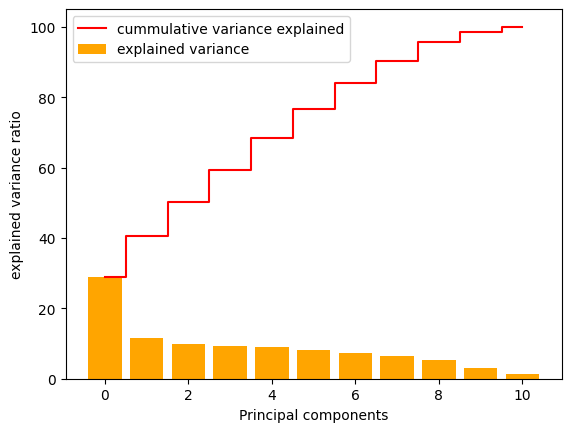

In [1042]:
#plot
plt.bar(range(11),var_exp,align="center",color="orange",label="explained variance")
plt.step(range(11),cum_var_exp,where="mid",color="red",label="cummulative variance explained")
plt.xlabel("Principal components")
plt.ylabel("explained variance ratio")
plt.legend(loc="best")

from the above scree plot the first 9 principal components are explaining about 90-95% of the variation . 
so we can choose optimal number of principal components as 9

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering) 

In [1043]:
pca= PCA(n_components=9)

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9"])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878


In [1044]:
errors=[]
cluster_range=range(2,15)
for i in cluster_range:
    clusters= KMeans(i,random_state=100)
    clusters.fit(pca_df)
    errors.append(clusters.inertia_)

errors

[18133.24669575591,
 16680.632624119582,
 14487.96247778084,
 13352.274530318397,
 12393.430722577748,
 11725.544060456266,
 11182.276342984116,
 10733.371470841292,
 10359.177905969062,
 10009.283334150115,
 9801.228484030704,
 9522.551108576508,
 9256.243457808538]

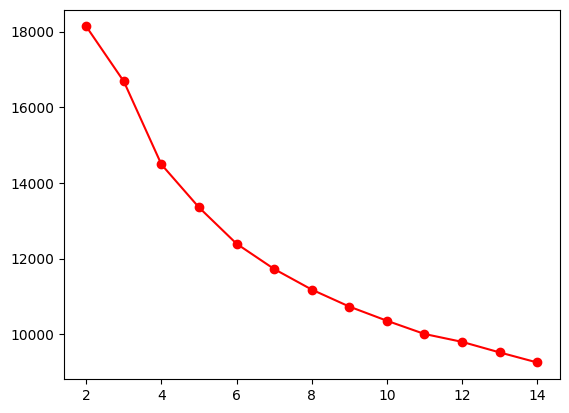

In [1045]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':errors})


plt.plot(cluster_df["num_clusters"],cluster_df["cluster_errors"],marker="o",color="r")


from elbow plot we can see at the cluste k =5 the inertia decreases significantly

In [1046]:
kmeans=KMeans(n_clusters=5,random_state=100) 
kmeans.fit(pca_df)


KMeans(n_clusters=5, random_state=100)

In [1047]:
label=pd.DataFrame(kmeans.labels_,columns=["label"])


In [1048]:
kmeans_df=pca_df.join(label)
kmeans_df.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873,2
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746,4
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851,2
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878,4


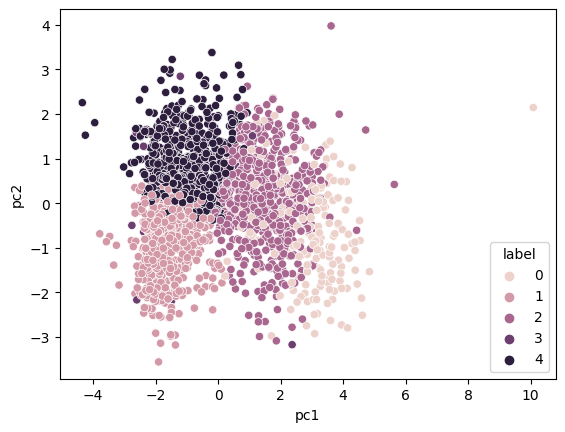

In [1054]:
sns.scatterplot(x=kmeans_df["pc1"],y=kmeans_df["pc2"],hue="label",data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

Apply Agglomerative clustering and segment the data

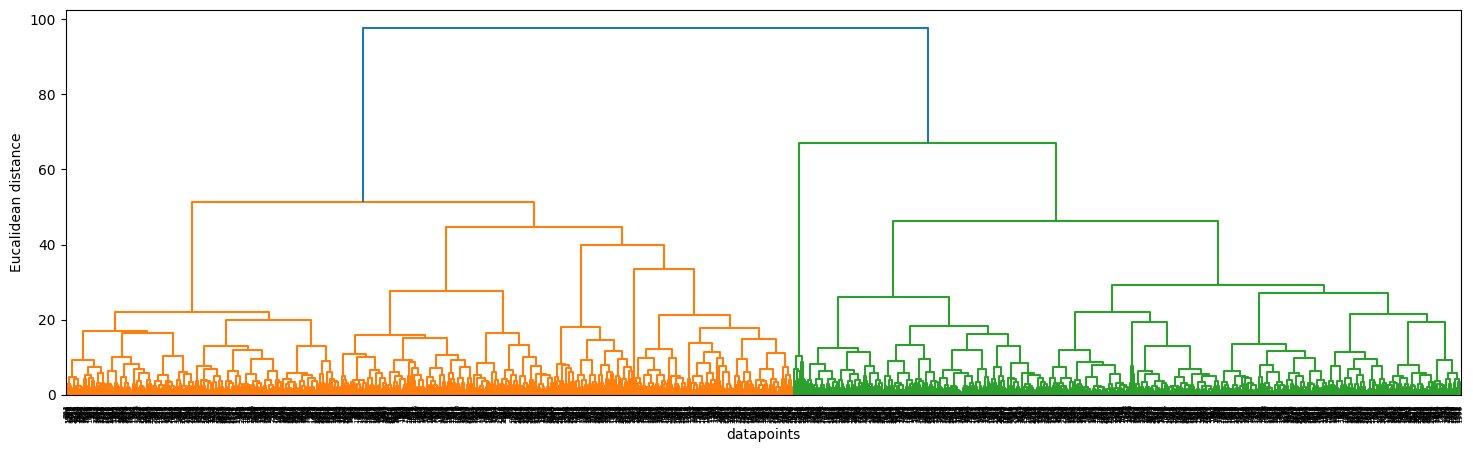

In [1055]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features_df,method="ward")
dendrogram(merg,leaf_rotation=90,)
plt.xlabel("datapoints")
plt.ylabel("Eucalidean distance")
plt.show()

Computing silhoutte score

In [1056]:
from sklearn.metrics import silhouette_score

In [1057]:
for i in range(2,15):
    hi=AgglomerativeClustering(n_clusters=i)
    hi=hi.fit(scaled_features_df)
    labels=hi.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249


the highest silhouette_score is for cluster 3
so lets choose k=3 as optimal cluster size

In [1058]:
hi_cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
hi_cluster_model=hi_cluster.fit(scaled_features_df)


In [1059]:
df_label1=pd.DataFrame(hi_cluster_model.labels_,columns=["labels"])
df_label1.head()

,labels
0,0
1,1
2,0
3,1
4,0


In [1060]:
hi=dfc.join(df_label1)
hi.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42,0


visualization

<Axes: xlabel='labels', ylabel='Total_Expenses'>

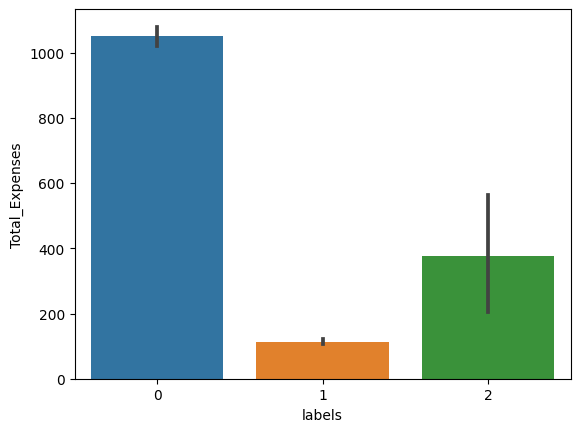

In [1061]:
sns.barplot(x=hi["labels"],y=hi["Total_Expenses"])

total expenses for cluster 0 is more than cluster 1 and 2

<Axes: xlabel='labels', ylabel='Income'>

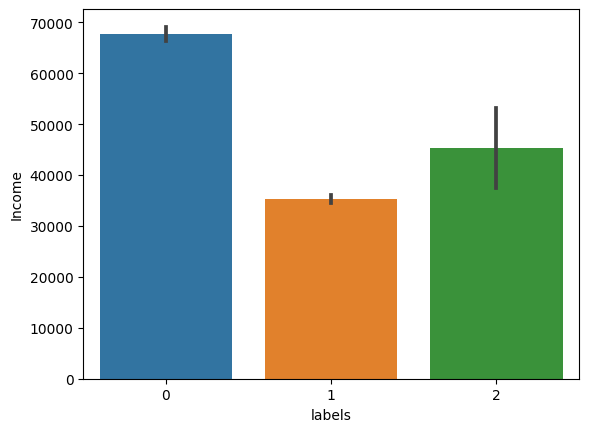

In [1068]:
sns.barplot(x=hi["labels"],y=hi["Income"])

In [ ]:
income is much higher for cluster 0 

<Axes: xlabel='Marital_Status', ylabel='count'>

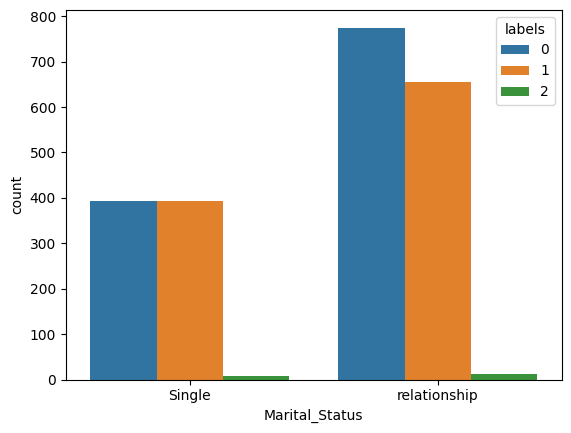

In [1066]:
sns.countplot(x=hi["Marital_Status"],hue="labels" , data=hi )

In [ ]:
most of the customers who are in a relationship fall under cluster 0

<Axes: xlabel='labels', ylabel='Num_Total_Purchases'>

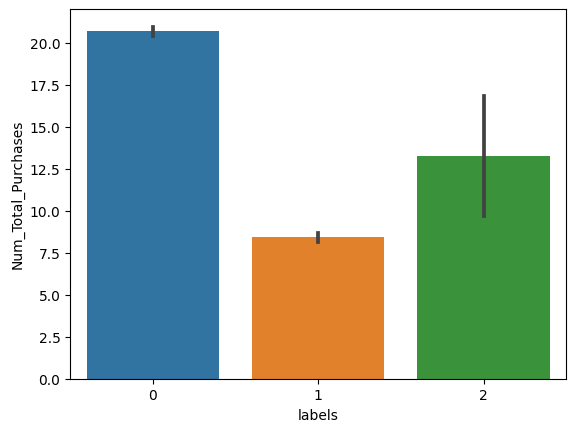

In [1071]:
sns.barplot(x=hi["labels"],y=hi["Num_Total_Purchases"])

total number of purchases is higher for customers from cluster 0 than 1 and 2

In [ ]:
customers from cluster 0 have higher income , higher total spending and higer total purchase
customers for cluster 1 have least income least total expenses and buy less products
customers for cluster 2 have avg income , avg total expenses and buy avg number of products